In [166]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score

import random

In [167]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

Define Best Parameters for Each Algorithm

### FourPeaks - Highlights Strength of GA

In [218]:
LENGTHS = [20, 40, 60, 80, 100]

bf1_rhc_list = []
bf1_sa_list = []
bf1_ga_list = []
bf1_mim_list = []

rhc_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
            'num_evals_to_best':[]}
sa_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
           'num_evals_to_best':[]}
ga_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
           'num_evals_to_best':[]}
mimic_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best':[]}

for i in range(0, len(LENGTHS)):
    
    length = LENGTHS[i]
    print("Trying Input Length", str(length))
    
    rhc_dict1['lengths'].append(length)
    sa_dict1['lengths'].append(length)
    ga_dict1['lengths'].append(length)
    mimic_dict1['lengths'].append(length)
    
    # Step 1
    fitness1 = mlrose.FourPeaks(t_pct=0.1)
    
    # Step 2
    problem1 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness1, maximize = True, max_val = 2)

    # Step 3 
    # RHC 
    start = time.time()
    bs1_rhc, bf1_rhc, curve1_rhc = mlrose.random_hill_climb(problem = problem1, 
                                               max_attempts = 1000, max_iters = 1000, 
                                               restarts = int(.50*length), 
                                               random_state = 42, curve = True)
    end_rhc = time.time()
    rhc_dict1['runtime'].append(end_rhc-start)
    rhc_dict1['best_fits'].append(bf1_rhc)
    rhc_dict1['fit_curves'].append(curve1_rhc)
    
    arr1 = np.array(bf1_rhc)
    arr1 = arr1.tolist()
    arr2 = list(curve1_rhc)
    num_evals = arr2.index(arr1) + 1
    rhc_dict1['num_evals_to_best'].append(num_evals)
    
    print("...Finished RHC in "+str(end_rhc-start))
    # SA 
    bs1_sa, bf1_sa, curve1_sa = mlrose.simulated_annealing(problem=problem1, 
                                               max_attempts=10, max_iters = 1000, 
                                               schedule = mlrose.GeomDecay(),
                                               random_state = 42, curve = True)
    end_sa = time.time()
    sa_dict1['runtime'].append(end_sa-end_rhc)
    sa_dict1['best_fits'].append(bf1_sa)
    sa_dict1['fit_curves'].append(curve1_sa)
    
    arr1 = np.array(bf1_sa)
    arr1 = arr1.tolist()
    arr2 = list(curve1_sa)
    num_evals = arr2.index(arr1) + 1
    sa_dict1['num_evals_to_best'].append(num_evals)
    
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs1_ga, bf1_ga, curve1_ga = mlrose.genetic_alg(problem=problem1, 
                                               pop_size = int(5*length), mutation_prob = 0.10,
                                               max_attempts=1000, max_iters = 100,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict1['runtime'].append(end_ga-end_sa)
    ga_dict1['best_fits'].append(bf1_ga)
    ga_dict1['fit_curves'].append(curve1_ga)
    
    arr1 = np.array(bf1_ga)
    arr1 = arr1.tolist()
    arr2 = list(curve1_ga)
    num_evals = arr2.index(arr1) + 1
    ga_dict1['num_evals_to_best'].append(num_evals)
    
    
    print("...Finished GA in "+ str(end_ga-end_sa))
    
    # MIMIC 
    bs1_mim, bf1_mim, curve1_mim = mlrose.mimic(problem=problem1, 
                                               #pop_size = int(5*length), keep_pct = 0.40,
                                               #pop_size = int(5*length), keep_pct = 0.20,
                                               pop_size = int(10*length), keep_pct = 0.10,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
     
    end_mimic = time.time()
    mimic_dict1['runtime'].append(end_mimic-end_ga)
    mimic_dict1['best_fits'].append(bf1_mim)
    mimic_dict1['fit_curves'].append(curve1_mim)
    
    arr1 = np.array(bf1_mim)
    arr1 = arr1.tolist()
    arr2 = list(curve1_mim)
    num_evals = arr2.index(arr1) + 1
    mimic_dict1['num_evals_to_best'].append(num_evals)
    
    
    print("...Finished MIMIC in "+ str(end_mimic-end_ga))
    
    bf1_rhc_list.append(bf1_rhc)
    bf1_sa_list.append(bf1_sa)
    bf1_ga_list.append(bf1_ga)
    bf1_mim_list.append(bf1_mim)
    

print(bf1_rhc_list)
print(bf1_sa_list)
print(bf1_ga_list)
print(bf1_mim_list)

Trying Input Length 20
...Finished RHC in 0.18634915351867676
...Finished SA in 0.003100156784057617
...Finished GA in 0.5834739208221436
...Finished MIMIC in 1.948859691619873
Trying Input Length 40
...Finished RHC in 0.36483001708984375
...Finished SA in 0.013524055480957031
...Finished GA in 1.1879029273986816
...Finished MIMIC in 11.075073957443237
Trying Input Length 60
...Finished RHC in 0.5170431137084961
...Finished SA in 0.021641969680786133


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 1.8837921619415283
...Finished MIMIC in 26.521622896194458
Trying Input Length 80
...Finished RHC in 0.6741268634796143
...Finished SA in 0.030723094940185547


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 3.2987890243530273
...Finished MIMIC in 65.43338775634766
Trying Input Length 100
...Finished RHC in 0.7990059852600098
...Finished SA in 0.03348088264465332


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 3.6112921237945557
...Finished MIMIC in 88.11939001083374
[37.0, 40.0, 103.0, 48.0, 42.0]
[37.0, 64.0, 94.0, 23.0, 32.0]
[35.0, 60.0, 80.0, 104.0, 122.0]
[33.0, 65.0, 98.0, 112.0, 147.0]


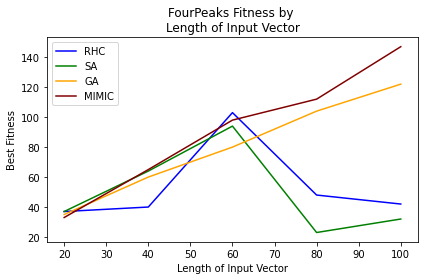

In [219]:
plt.clf()
plt.plot(rhc_dict1['lengths'], rhc_dict1['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict1['lengths'], sa_dict1['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict1['lengths'], ga_dict1['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict1['lengths'], mimic_dict1['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("FourPeaks Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FourPeaks_Fitness.png")
plt.show()

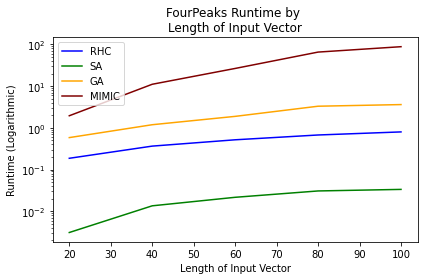

In [224]:
plt.clf()
plt.plot(rhc_dict1['lengths'], rhc_dict1['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict1['lengths'], sa_dict1['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict1['lengths'], ga_dict1['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict1['lengths'], mimic_dict1['runtime'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime (Logarithmic)")
plt.yscale('log')
plt.title("FourPeaks Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FourPeaks_Runtime.png")
plt.show()

In [229]:
mimic_dict1['num_evals_to_best']

[4, 11, 14, 16, 14]

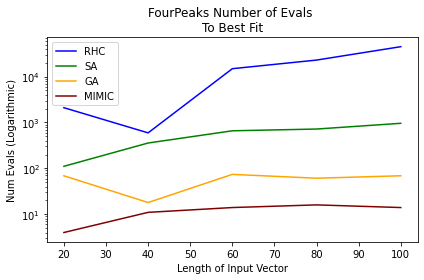

In [228]:
plt.clf()
plt.plot(rhc_dict1['lengths'], rhc_dict1['num_evals_to_best'], label = "RHC", color = 'blue')
plt.plot(sa_dict1['lengths'], sa_dict1['num_evals_to_best'], label = "SA", color = 'green')
plt.plot(ga_dict1['lengths'], ga_dict1['num_evals_to_best'], label = "GA", color = 'orange')
plt.plot(mimic_dict1['lengths'], mimic_dict1['num_evals_to_best'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("Num Evals (Logarithmic)")
plt.yscale('log')
plt.title("FourPeaks Number of Evals \nTo Best Fit")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FourPeaks_NumEvals.png")
plt.show()

### FlipFlop - Highlights Strength of SA

In [260]:
LENGTHS = [20, 40, 60, 80, 100]

bf2_rhc_list = []
bf2_sa_list = []
bf2_ga_list = []
bf2_mim_list = []

rhc_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
sa_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
ga_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
mimic_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}

for i in range(0, len(LENGTHS)):
    
    length = LENGTHS[i]
    
    print("Trying Input Length", str(length))
    
    rhc_dict2['lengths'].append(length)
    sa_dict2['lengths'].append(length)
    ga_dict2['lengths'].append(length)
    mimic_dict2['lengths'].append(length)
    
    # Step 1
    fitness2 = mlrose.FlipFlop()
    
    # Step 2
    problem2 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness2, maximize = True, max_val = 2)
    
    # Step 3 
    # RHC 
    start = time.time()
    bs2_rhc, bf2_rhc, curve2_rhc = mlrose.random_hill_climb(problem = problem2, 
                                               max_attempts = 1000, max_iters = 100, 
                                               restarts = int(1.0*length), 
                                               random_state = 42, curve = True)
    end_rhc = time.time()
    rhc_dict2['runtime'].append(end_rhc-start)
    rhc_dict2['best_fits'].append(bf2_rhc)
    rhc_dict2['fit_curves'].append(curve2_rhc)

    #arr1 = bf2_rhc.tolist()
    arr1 = np.array(bf2_rhc)
    arr1 = arr1.tolist()
    arr2 = list(curve2_rhc)
    num_evals = arr2.index(arr1) + 1
    rhc_dict2['num_evals_to_best'].append(num_evals)
    
    print("...Finished RHC in "+str(end_rhc-start))
    
    # SA 
    bs2_sa, bf2_sa, curve2_sa = mlrose.simulated_annealing(problem=problem2, 
                                               max_attempts=100, max_iters = 1000, 
                                               schedule = mlrose.GeomDecay(init_temp=3, decay=0.98),
                                               random_state = 42, curve = True)
    end_sa = time.time()
    sa_dict2['runtime'].append(end_sa-end_rhc)
    sa_dict2['best_fits'].append(bf2_sa)
    sa_dict2['fit_curves'].append(curve2_sa)
    
    arr1 = np.array(bf2_sa)
    arr1 = arr1.tolist()
    arr2 = list(curve2_sa)
    num_evals = arr2.index(arr1) + 1
    sa_dict2['num_evals_to_best'].append(num_evals) 
    
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs2_ga, bf2_ga, curve2_ga = mlrose.genetic_alg(problem=problem2, 
                                               pop_size = int(2*length), mutation_prob = 0.20,
                                               max_attempts=1000, max_iters = 10,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict2['runtime'].append(end_ga-end_sa)
    ga_dict2['best_fits'].append(bf2_ga)
    ga_dict2['fit_curves'].append(curve2_ga)
    

    arr1 = np.array(bf2_ga)
    arr1 = arr1.tolist()
    arr2 = list(curve2_ga)
    num_evals = arr2.index(arr1) + 1
    ga_dict2['num_evals_to_best'].append(num_evals) 
    
    print("...Finished GA in "+str(end_ga-end_sa))
    
    # MIMIC 
    bs2_mim, bf2_mim, curve2_mim = mlrose.mimic(problem=problem2, 
                                               #pop_size = int(3*length), keep_pct = 0.40,
                                               pop_size = int(10*length), keep_pct = 0.40,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
    
    end_mimic = time.time()
    mimic_dict2['runtime'].append(end_mimic-end_ga)
    mimic_dict2['best_fits'].append(bf2_mim)
    mimic_dict2['fit_curves'].append(curve2_mim)
    
    arr1 = np.array(bf2_mim)
    arr1 = arr1.tolist()
    arr2 = list(curve2_mim)
    num_evals = arr2.index(arr1) + 1
    mimic_dict2['num_evals_to_best'].append(num_evals) 
   
    print("...Finished MIMIC in "+str(end_mimic-end_ga))
    
    
    bf2_rhc_list.append(bf2_rhc)
    bf2_sa_list.append(bf2_sa)
    bf2_ga_list.append(bf2_ga)
    bf2_mim_list.append(bf2_mim)
    

print(bf2_rhc_list)
print(bf2_sa_list)
print(bf2_ga_list)
print(bf2_mim_list)

Trying Input Length 20
...Finished RHC in 0.03727388381958008
...Finished SA in 0.012279033660888672
...Finished GA in 0.03333401679992676


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished MIMIC in 2.3073599338531494
Trying Input Length 40
...Finished RHC in 0.08717703819274902
...Finished SA in 0.028300046920776367
...Finished GA in 0.06495785713195801
...Finished MIMIC in 10.571841955184937
Trying Input Length 60
...Finished RHC in 0.20493698120117188


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished SA in 0.05569911003112793
...Finished GA in 0.1102747917175293
...Finished MIMIC in 28.296558141708374
Trying Input Length 80
...Finished RHC in 0.26641011238098145
...Finished SA in 0.040940046310424805


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 0.17146086692810059
...Finished MIMIC in 70.40792107582092
Trying Input Length 100
...Finished RHC in 0.3898138999938965
...Finished SA in 0.04538989067077637


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 0.24145722389221191
...Finished MIMIC in 110.58231496810913
[18.0, 37.0, 54.0, 67.0, 81.0]
[19.0, 36.0, 58.0, 73.0, 96.0]
[16.0, 30.0, 42.0, 55.0, 69.0]
[19.0, 39.0, 57.0, 77.0, 98.0]


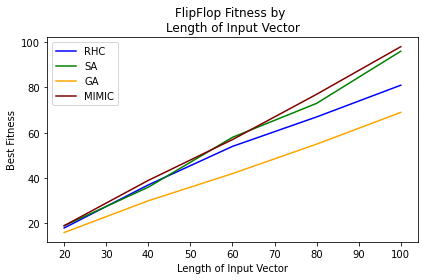

In [261]:
plt.clf()
plt.plot(rhc_dict2['lengths'], rhc_dict2['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict2['lengths'], sa_dict2['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict2['lengths'], ga_dict2['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict2['lengths'], mimic_dict2['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("FlipFlop Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FlipFlop_Fitness.png")
plt.show()

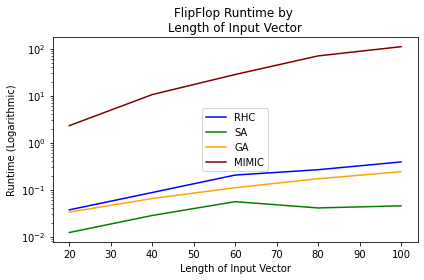

In [262]:
plt.clf()
plt.plot(rhc_dict2['lengths'], rhc_dict2['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict2['lengths'], sa_dict2['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict2['lengths'], ga_dict2['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict2['lengths'], mimic_dict2['runtime'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime (Logarithmic)")
plt.yscale('log')
plt.title("FlipFlop Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FlipFlop_Runtime.png")
plt.show()

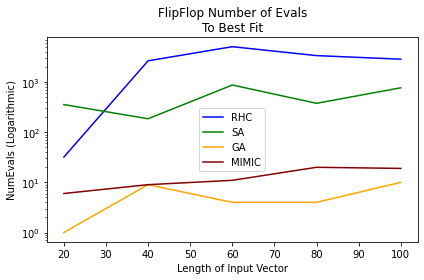

In [263]:
plt.clf()
plt.plot(rhc_dict2['lengths'], rhc_dict2['num_evals_to_best'], label = "RHC", color = 'blue')
plt.plot(sa_dict2['lengths'], sa_dict2['num_evals_to_best'], label = "SA", color = 'green')
plt.plot(ga_dict2['lengths'], ga_dict2['num_evals_to_best'], label = "GA", color = 'orange')
plt.plot(mimic_dict2['lengths'], mimic_dict2['num_evals_to_best'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("NumEvals (Logarithmic)")
plt.yscale('log')
plt.title("FlipFlop Number of Evals\nTo Best Fit")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FlipFlop_NumEvals.png")
plt.show()

### Knapsack - GA is best


In [256]:
LENGTHS = [20, 40, 60, 80, 100]

bf3_rhc_list = []
bf3_sa_list = []
bf3_ga_list = []
bf3_mim_list = []

rhc_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
sa_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
ga_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
mimic_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []
              }

for i in range(0, len(LENGTHS)):
   
    length = LENGTHS[i]
    print("Trying Input Length", str(length))
    
    rhc_dict3['lengths'].append(length)
    sa_dict3['lengths'].append(length)
    ga_dict3['lengths'].append(length)
    mimic_dict3['lengths'].append(length)
    
    # Step 1
    random.seed(42)
    weights = []
    values = []

    for i in range(length):    
        weights.append(random.randint(1, 100))
        values.append(random.randint(1, 100))
        
    fitness3 = mlrose.Knapsack(weights=weights, values=values, max_weight_pct = 0.35)
    
    # Step 2
    problem3 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness3, maximize = True, max_val = 2)
    
    # Step 3 
    # RHC 
    start = time.time()
    bs3_rhc, bf3_rhc, curve3_rhc = mlrose.random_hill_climb(problem = problem3, 
                                               max_attempts = 100, max_iters = 1000, 
                                               restarts = int(2.0*length), 
                                               random_state = 42, curve = True)
    end_rhc = time.time()
    rhc_dict3['runtime'].append(end_rhc-start)
    rhc_dict3['best_fits'].append(bf3_rhc)
    rhc_dict3['fit_curves'].append(curve3_rhc)
    
    arr1 = bf3_rhc.tolist()
    arr2 = list(curve3_rhc)
    num_evals = arr2.index(arr1) + 1
    rhc_dict3['num_evals_to_best'].append(num_evals)
    
    print("...Finished RHC in "+str(end_rhc-start))
    
    # SA 
    bs3_sa, bf3_sa, curve3_sa = mlrose.simulated_annealing(problem=problem3, 
                                               max_attempts=1000, max_iters = 1000, 
                                               schedule = mlrose.GeomDecay(),
                                               random_state = 42, curve = True)
    end_sa = time.time()
    sa_dict3['runtime'].append(end_sa-end_rhc)
    sa_dict3['best_fits'].append(bf3_sa)
    sa_dict3['fit_curves'].append(curve3_sa)
    
    arr3 = bf3_sa.tolist()
    arr4 = list(curve3_sa)
    num_evals = arr4.index(arr3) + 1
    sa_dict3['num_evals_to_best'].append(num_evals)
    
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs3_ga, bf3_ga, curve3_ga = mlrose.genetic_alg(problem=problem3, 
                                               #pop_size = int(10*length), mutation_prob = 0.10,
                                               #pop_size = int(10*length), mutation_prob = 0.01,
                                               pop_size = int(3*length), mutation_prob = 0.01,
                                               max_attempts=100, max_iters = 100,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict3['runtime'].append(end_ga-end_sa)
    ga_dict3['best_fits'].append(bf3_ga)
    ga_dict3['fit_curves'].append(curve3_ga)
    
    arr5 = bf3_ga.tolist()
    arr6 = list(curve3_ga)
    num_evals = arr6.index(arr5) + 1
    ga_dict3['num_evals_to_best'].append(num_evals)
    
    print("...Finished GA in "+str(end_ga-end_sa))
    
    # MIMIC 
    bs3_mim, bf3_mim, curve3_mim = mlrose.mimic(problem=problem3, 
                                               #pop_size = int(5*length), keep_pct = 0.40,
                                               pop_size = int(1*length), keep_pct = 0.10,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
    

    end_mimic = time.time()
    mimic_dict3['runtime'].append(end_mimic-end_ga)
    mimic_dict3['best_fits'].append(bf3_mim)
    mimic_dict3['fit_curves'].append(curve3_mim)
     
    arr7 = bf3_mim.tolist()
    arr8 = list(curve3_mim)
    num_evals = arr8.index(arr7) + 1
    mimic_dict3['num_evals_to_best'].append(num_evals)
    print("...Finished MIMIC in "+str(end_mimic-end_ga))
    
    
    bf3_rhc_list.append(bf3_rhc)
    bf3_sa_list.append(bf3_sa)
    bf3_ga_list.append(bf3_ga)
    bf3_mim_list.append(bf3_mim)
    

print(bf3_rhc_list)
print(bf3_sa_list)
print(bf3_ga_list)
print(bf3_mim_list)

Trying Input Length 20
...Finished RHC in 0.13529300689697266
...Finished SA in 0.037088871002197266
...Finished GA in 0.4094972610473633
...Finished MIMIC in 1.4719738960266113
Trying Input Length 40
...Finished RHC in 0.25642895698547363
...Finished SA in 0.03849983215332031


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 0.8351984024047852
...Finished MIMIC in 6.239397764205933
Trying Input Length 60
...Finished RHC in 0.39073681831359863
...Finished SA in 0.06435608863830566


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 1.406125783920288
...Finished MIMIC in 37.07580327987671
Trying Input Length 80
...Finished RHC in 0.5913619995117188
...Finished SA in 0.05496025085449219


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 2.0645158290863037
...Finished MIMIC in 26.60813879966736
Trying Input Length 100
...Finished RHC in 0.7656300067901611
...Finished SA in 0.06363415718078613


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 2.638969659805298
...Finished MIMIC in 53.515040159225464
[409.0, 953.0, 1396.0, 1759.0, 2392.0]
[390.0, 679.0, 1201.0, 1624.0, 2239.0]
[549.0, 1180.0, 1885.0, 2351.0, 3128.0]
[386.0, 804.0, 1534.0, 1804.0, 2623.0]


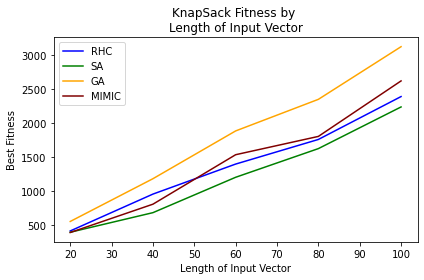

In [257]:
plt.clf()
plt.plot(rhc_dict3['lengths'], rhc_dict3['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict3['lengths'], sa_dict3['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict3['lengths'], ga_dict3['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict3['lengths'], mimic_dict3['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("KnapSack Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_KnapSack_Fitness.png")
plt.show()

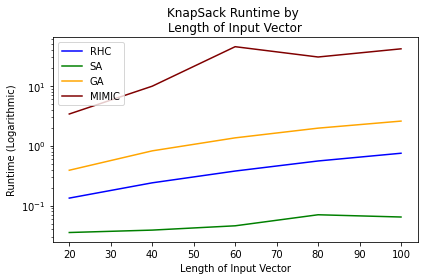

In [254]:
plt.clf()
plt.plot(rhc_dict3['lengths'], rhc_dict3['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict3['lengths'], sa_dict3['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict3['lengths'], ga_dict3['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict3['lengths'], mimic_dict3['runtime'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime (Logarithmic)")
plt.yscale("log")
plt.title("KnapSack Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_Knapsack_Runtime.png")
plt.show()

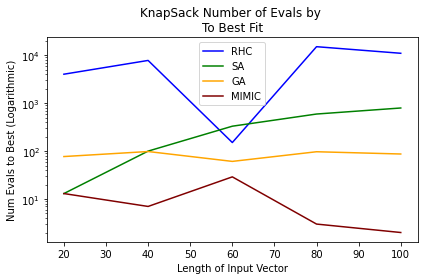

In [255]:
plt.clf()
plt.plot(rhc_dict3['lengths'], rhc_dict3['num_evals_to_best'], label = "RHC", color = 'blue')
plt.plot(sa_dict3['lengths'], sa_dict3['num_evals_to_best'], label = "SA", color = 'green')
plt.plot(ga_dict3['lengths'], ga_dict3['num_evals_to_best'], label = "GA", color = 'orange')
plt.plot(mimic_dict3['lengths'], mimic_dict3['num_evals_to_best'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Num Evals to Best (Logarithmic)")
plt.yscale("log")
plt.title("KnapSack Number of Evals by \nTo Best Fit")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_Knapsack_NumEvals.png")
plt.show()

## K Color - MIMIC Best? 

In [204]:
LENGTHS = [20, 40, 60, 80, 100]

bf4_rhc_list = []
bf4_sa_list = []
bf4_ga_list = []
bf4_mim_list = []

rhc_dict4 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
sa_dict4 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
ga_dict4 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
mimic_dict4 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []
              }

for i in range(0, len(LENGTHS)):
   
    length = LENGTHS[i]
    print("Trying Input Length", str(length))
    
    rhc_dict4['lengths'].append(length)
    sa_dict4['lengths'].append(length)
    ga_dict4['lengths'].append(length)
    mimic_dict4['lengths'].append(length)
    
    # Step 1

    random.seed(42)
    tuple_list = []

    for i in range(0, length):    
        a = random.randint(1, length-1)
        b = random.randint(1, length-1)
        tuple_list.append((a,b))
    
    fitness4 = mlrose.MaxKColor(edges=tuple_list)
        
    # Step 2
    problem4 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness4, maximize = True, max_val = 2)
    
    # Step 3 
    # RHC 
    start = time.time()
        
    bs4_rhc, bf4_rhc, curve4_rhc = mlrose.random_hill_climb(problem = problem4, 
                                               max_attempts = 1000, max_iters = 1000, 
                                               restarts = int(.10*length), 
                                               random_state = 42, curve = True)
    
    end_rhc = time.time()
    rhc_dict4['runtime'].append(end_rhc-start)
    rhc_dict4['best_fits'].append(bf4_rhc)
    rhc_dict4['fit_curves'].append(curve4_rhc)
    
    arr1 = np.array(bf4_rhc)
    arr1 = arr1.tolist()
    arr2 = list(curve4_rhc)
    num_evals = arr2.index(arr1) + 1
    rhc_dict4['num_evals_to_best'].append(num_evals)
    
    print("...Finished RHC in "+str(end_rhc-start))
    
    # SA 
    bs4_sa, bf4_sa, curve4_sa = mlrose.simulated_annealing(problem=problem4, 
                                               max_attempts=100, max_iters = 1000, 
                                               schedule = mlrose.ExpDecay(),
                                               random_state = 42, curve = True)
    
    end_sa = time.time()
    sa_dict4['runtime'].append(end_sa-end_rhc)
    sa_dict4['best_fits'].append(bf4_sa)
    sa_dict4['fit_curves'].append(curve4_sa)
    

    arr3 = np.array(bf4_sa)
    arr3 = arr3.tolist()
    arr4 = list(curve4_sa)
    num_evals = arr4.index(arr3) + 1
    sa_dict4['num_evals_to_best'].append(num_evals)
    
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs4_ga, bf4_ga, curve4_ga = mlrose.genetic_alg(problem=problem4, 
                                               pop_size = int(0.75*length), mutation_prob = 0.50,
                                               max_attempts=100, max_iters = 10,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict4['runtime'].append(end_ga-end_sa)
    ga_dict4['best_fits'].append(bf4_ga)
    ga_dict4['fit_curves'].append(curve4_ga)
    
    arr5 = np.array(bf4_ga)
    arr5 = arr5.tolist()
    arr6 = list(curve4_ga)
    num_evals = arr6.index(arr5) + 1
    ga_dict4['num_evals_to_best'].append(num_evals)
    
    print("...Finished GA in "+str(end_ga-end_sa))
    
    # MIMIC 
    bs4_mim, bf4_mim, curve4_mim = mlrose.mimic(problem=problem4, 
                                               pop_size = int(5*length), keep_pct = 0.20,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
    

    end_mimic = time.time()
    mimic_dict4['runtime'].append(end_mimic-end_ga)
    mimic_dict4['best_fits'].append(bf4_mim)
    mimic_dict4['fit_curves'].append(curve4_mim)
     
    arr7 = np.array(bf4_mim)
    arr7 = arr7.tolist()
    arr8 = list(curve4_mim)
    num_evals = arr8.index(arr7) + 1
    mimic_dict4['num_evals_to_best'].append(num_evals)
    print("...Finished MIMIC in "+str(end_mimic-end_ga))
    
    
    bf4_rhc_list.append(bf4_rhc)
    bf4_sa_list.append(bf4_sa)
    bf4_ga_list.append(bf4_ga)
    bf4_mim_list.append(bf4_mim)
    

print(bf4_rhc_list)
print(bf4_sa_list)
print(bf4_ga_list)
print(bf4_mim_list)

Trying Input Length 20
...Finished RHC in 0.0818629264831543
...Finished SA in 0.032708168029785156
...Finished GA in 0.01641988754272461
...Finished MIMIC in 2.188974142074585
Trying Input Length 40
...Finished RHC in 0.1851949691772461
...Finished SA in 0.04123330116271973
...Finished GA in 0.036313772201538086
...Finished MIMIC in 10.114843130111694
Trying Input Length 60
...Finished RHC in 0.24714183807373047
...Finished SA in 0.06447219848632812
...Finished GA in 0.0808708667755127
...Finished MIMIC in 27.156040906906128
Trying Input Length 80
...Finished RHC in 0.4782979488372803
...Finished SA in 0.09517693519592285
...Finished GA in 0.13315606117248535
...Finished MIMIC in 52.77870321273804
Trying Input Length 100
...Finished RHC in 0.5254919528961182
...Finished SA in 0.08118391036987305
...Finished GA in 0.2072608470916748
...Finished MIMIC in 93.46689319610596
[20.0, 39.0, 53.0, 72.0, 88.0]
[20.0, 40.0, 53.0, 75.0, 87.0]
[17.0, 28.0, 44.0, 52.0, 67.0]
[19.0, 39.0, 58.0, 72.0

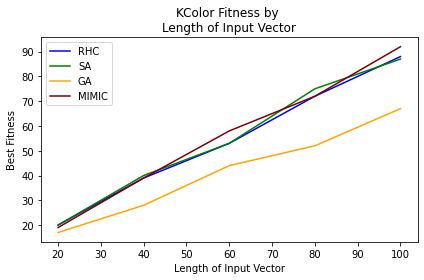

In [241]:
plt.clf()
plt.plot(rhc_dict4['lengths'], rhc_dict4['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict4['lengths'], sa_dict4['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict4['lengths'], ga_dict4['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict4['lengths'], mimic_dict4['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("KColor Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_KColor_Fitness.png")
plt.show()

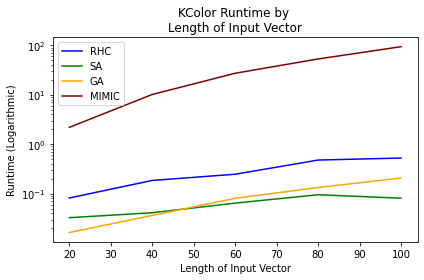

In [242]:
plt.clf()
plt.plot(rhc_dict4['lengths'], rhc_dict4['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict4['lengths'], sa_dict4['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict4['lengths'], ga_dict4['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict3['lengths'], mimic_dict4['runtime'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime (Logarithmic)")
plt.yscale('log')
plt.title("KColor Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_KColor_Runtime.png")
plt.show()

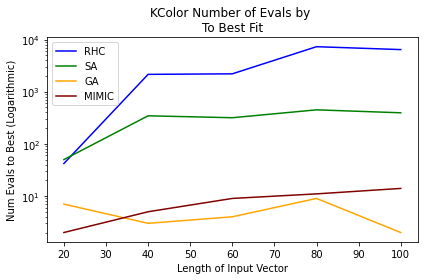

In [243]:
plt.clf()
plt.plot(rhc_dict4['lengths'], rhc_dict4['num_evals_to_best'], label = "RHC", color = 'blue')
plt.plot(sa_dict4['lengths'], sa_dict4['num_evals_to_best'], label = "SA", color = 'green')
plt.plot(ga_dict4['lengths'], ga_dict4['num_evals_to_best'], label = "GA", color = 'orange')
plt.plot(mimic_dict4['lengths'], mimic_dict4['num_evals_to_best'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Num Evals to Best (Logarithmic)")
plt.yscale('log')
plt.title("KColor Number of Evals by \nTo Best Fit")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_KColor_NumEvals.png")
plt.show()